<a href="https://colab.research.google.com/github/JohanFendi/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np
import matplotlib.pyplot as plt


url = "https://homl.info/titanic.tgz"
path = "datasets/titanic.tgz"
dir_name = "datasets"

def load_data(url, path, dir_name):
  file_path = Path(path)
  if not file_path.is_file():
    Path(dir_name).mkdir(exist_ok=True,parents=True)
    respons = urllib.request.urlretrieve(url, file_path)
    with tarfile.open(file_path) as data_tarball:
      data_tarball.extractall(path=dir_name)


def get_titanic_data():
  return pd.read_csv(Path("datasets/titanic/test.csv")), pd.read_csv(Path("datasets/titanic/train.csv"))

load_data(url, path, dir_name)
test, train = get_titanic_data()



In [ ]:
print(train.info())
print(train.head())
print(train["Embarked"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

(array([  1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   5.,   2.,
         19.,  45., 135.,  66.,  21.,   3.,  18.,   5.,  28.,   0.,   9.,
          1.,  11.,  44.,   9.,  19.,  18.,  19.,   2.,   6.,   5.,   6.,
         11.,  11.,   4.,  10.,   8.,  65.,  17.,   9.,  18.,  14.,   6.,
         11.,   4.,   5.,  10.,   4.,   0.,   7.,   3.,  12.,  10.,  14.,
          3.,   4.,   4.,   9.,   8.,   7.,  16.,   8.,   5.,   8.,   0.,
          0.,   2.,   9.,   0.,   4.,   0.,   7.,   0.,   6.,   3.,   2.,
          0.,   0.,   0.,   0.,   4.,   1.,   4.,   2.,   0.,   6.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          3.]),
 array([1.38941449, 1.43791002, 1.48640555, 1.53490108, 1.5833966 ,
        1.63189213, 1.68038766, 1.72888319, 1.77737872, 1.82587425,
        1.87436978, 1.92286531, 1.97136084, 2.01985637, 2.06835189,
        2.11684742, 2.16534295, 2.21383848, 2.26233401, 2.31082954,
        2.35932507, 2.4078206 , 2.45631613, 2.

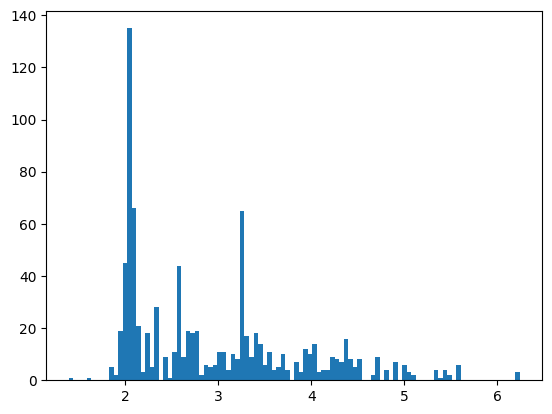

In [13]:
log_fare = np.log(train["Fare"][train["Fare"] > 0])
plt.hist(log_fare, bins = 100)


(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]), array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]), <BarContainer object of 10 artists>)


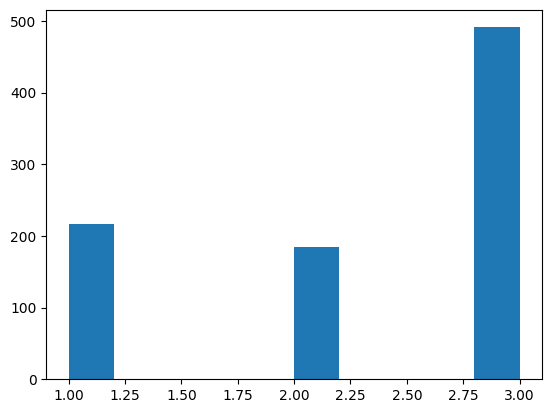

In [21]:
print(plt.hist(train["Pclass"]))

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer


num_imputer = SimpleImputer(strategy="mean")
obj_imputer = SimpleImputer(strategy="most_frequent")
log_transformer = FunctionTransformer(np.log)

preprocessing = ColumnTransformer(
    [
        ("num_imputer", num_imputer, ["Age"]),
        ("obj_imputer", obj_imputer, ["Embarked"]),
        ("log_transformer", log_transformer, ["Fare"]),
        ("dropper", "drop", ["Name", "Ticket", "Cabin", "PassengerId"])
    ], remainder="passthrough"
)



In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()

dt_pipeline = Pipeline(
    [
        ("pre", preprocessing),
        ("clf", dt_classifier)
    ]
)

rf_pipeline = Pipeline(
    [
        ("pre", preprocessing),
        ("clf", rf_classifier)
    ]
)


In [28]:
train_y, train_x = train["Survived"], train.drop(columns=["Survived"])

dt_pipeline.fit(train_x, train_y)




/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


ValueError: could not convert string to float: 'S'